# Regression - Rakam Tahminleme

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("advertising.csv")

## EDA - Exploratory Data Analysis

In [4]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [8]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


In [9]:
df.shape

(200, 4)

In [10]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

<AxesSubplot:>

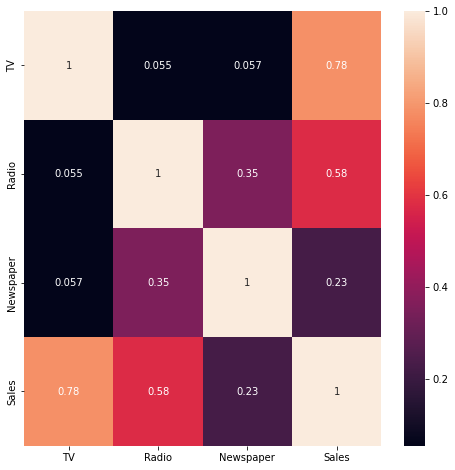

In [12]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True)#değerlerin bir grafikte renk desenleri olarak temsil edildiği karşılaştırmalı verileri görüntüler.

In [13]:
abs(df.corr()['Sales'].sort_values(ascending=False)) #korrelasyon çeşitleri= Pearson, Spearman, Kendall 0.20 ile 0.90 arasını alıyoruz
#0.90 üstü veride tekrar olduğunu gösterir, 0.20 altı ise no contribution (korrelasyonu büyükten küçüğe sıraladık)
#Fiyatın diğer sütunlara korrelasyonunu büyükten küçüğe sıraladı

Sales        1.000000
TV           0.782224
Radio        0.576223
Newspaper    0.228299
Name: Sales, dtype: float64

<AxesSubplot:xlabel='TV'>

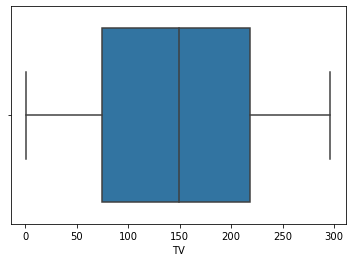

In [14]:
sns.boxplot(x=df["TV"])

<AxesSubplot:xlabel='Radio'>

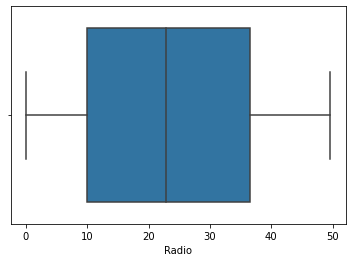

In [15]:
sns.boxplot(x=df["Radio"])

<AxesSubplot:xlabel='Newspaper'>

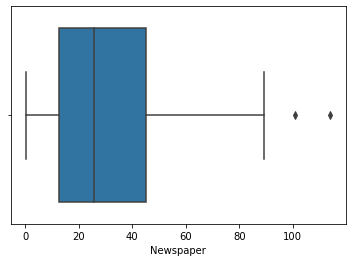

In [16]:
sns.boxplot(x=df["Newspaper"])

### Modelling

In [19]:
x=df[["TV","Radio","Newspaper"]]
y=df[["Sales"]]

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42) 


In [22]:
x_train.shape,x_test.shape 

((160, 3), (40, 3))

In [23]:
from sklearn.linear_model import LinearRegression 

In [24]:
lr=LinearRegression()

In [25]:
model=lr.fit(x_train,y_train)

In [26]:
tahmin=model.predict(x_test)

In [27]:
from sklearn.metrics import r2_score, mean_squared_error

In [28]:
(mean_squared_error(tahmin,y_test))**(0.5)
#tahmin ettiğimiz değerle kenara koyduğumuz değeri karşılaştır

1.7815996615334502

In [29]:
r2_score(tahmin,y_test)

0.8791069137120034